In [23]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [24]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [25]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((119, 50), (30, 50), (119,), (30,))

In [27]:
from sklearn.svm import SVC

In [36]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [37]:
model.fit(x_train,y_train)
print('model trained sucessfully')

model trained sucessfully


In [38]:
# score
model.score(x_train,y_train)

0.9411764705882353

In [42]:
# score
model.score(x_test,y_test)

0.7

In [43]:
from sklearn import metrics

In [44]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)# proability

In [48]:
cm = metrics.confusion_matrix(y_test,y_pred)

cm

array([[ 7,  7],
       [ 2, 14]], dtype=int64)

In [50]:
cm = metrics.confusion_matrix(y_test,y_pred)

cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)

cm

array([[ 7,  7],
       [ 2, 14],
       [ 9, 21]], dtype=int64)

In [51]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[ 7,  7, 14],
       [ 2, 14, 16],
       [ 9, 21, 30]], dtype=int64)

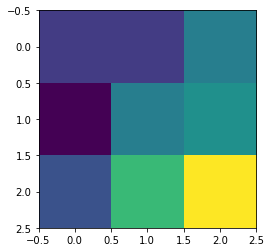

In [52]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)

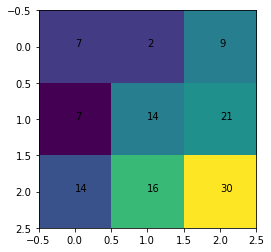

In [53]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])

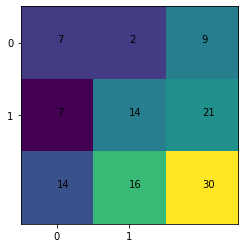

In [54]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

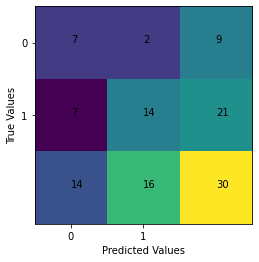

In [55]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [57]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.777778,0.5000,0.608696,14.0
female,0.666667,0.8750,0.756757,16.0
accuracy,0.700000,0.7000,0.700000,0.7
macro avg,0.722222,0.6875,0.682726,30.0
weighted avg,0.718519,0.7000,0.687662,30.0


In [59]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.38356164383561653

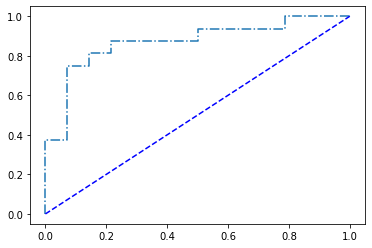

In [61]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])

plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')

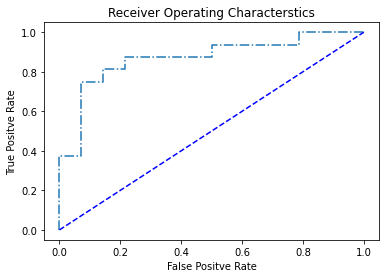

In [70]:
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])

plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')

plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

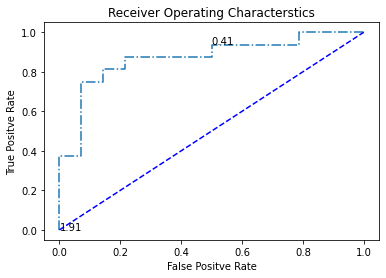

In [71]:
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])

plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),10):
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

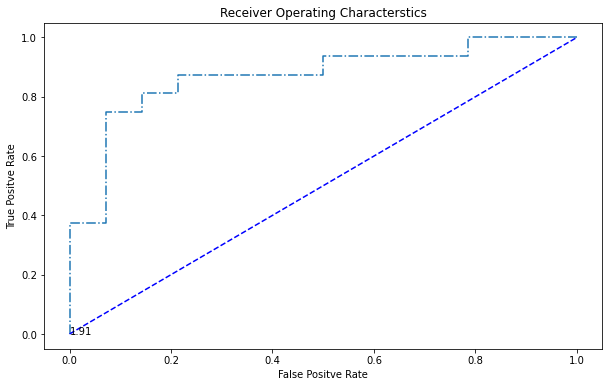

In [72]:
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

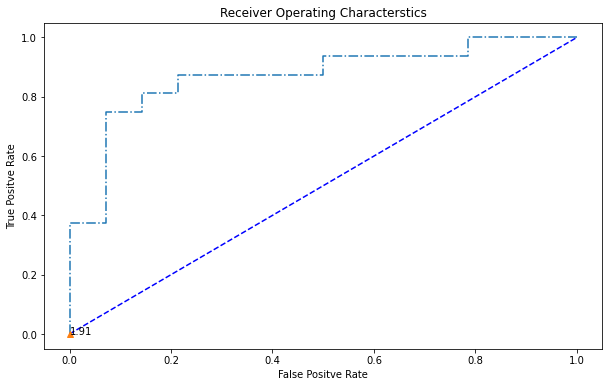

In [73]:
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

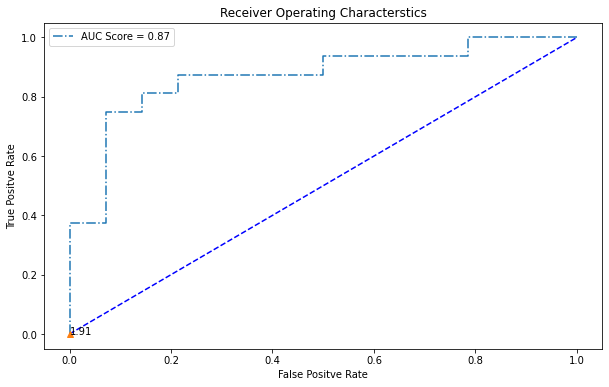

In [74]:
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [75]:
model_tune = SVC()

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1],}

In [78]:
GridSearchCV(model_tune,param_grid=param_grid,scoring='')

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='')

In [79]:
metrics.SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc

In [84]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [85]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [86]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

In [87]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=0, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. C=1, coef0=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, coef0=1, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, coef0=1, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, coef0=1, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, coef0=1, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, coef0=1, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, coef0=1, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, coef0=1, gamma=0.1, kernel=poly ............................
[CV] .

[CV] ............. C=10, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=10, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=10, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, coef0=0, gamma=0.1, kernel=poly ...........................
[CV] ............ C=10, coef0=0, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, coef0=0, gamma=0.1, kernel=poly ...........................
[CV] ............ C=10, coef0=0, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, coef0=0, gamma=0.1, kernel=poly ...........................
[CV] ............ C=10, coef0=0, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, coef0=0, gamma=0.1, kernel=poly ...........................
[CV] ............ C=10, coef0=0, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, coef0=0, gamma=0.1, kernel=poly ...........................
[CV] .

[CV] ............ C=10, coef0=1, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=10, coef0=1, gamma=0.05, kernel=rbf ...........................
[CV] ............ C=10, coef0=1, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=10, coef0=1, gamma=0.05, kernel=rbf ...........................
[CV] ............ C=10, coef0=1, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] ........... C=10, coef0=1, gamma=0.05, kernel=poly, total=   0.0s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] ........... C=10, coef0=1, gamma=0.05, kernel=poly, total=   0.0s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] ........... C=10, coef0=1, gamma=0.05, kernel=poly, total=   0.0s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] ........... C=10, coef0=1, gamma=0.05, kernel=poly, total=   0.0s
[CV] C=10, coef0=1, gamma=0.05, kernel=poly ..........................
[CV] .

[CV] ............ C=20, coef0=0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=20, coef0=0, gamma=0.01, kernel=rbf ...........................
[CV] ............ C=20, coef0=0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=20, coef0=0, gamma=0.01, kernel=rbf ...........................
[CV] ............ C=20, coef0=0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=20, coef0=0, gamma=0.01, kernel=rbf ...........................
[CV] ............ C=20, coef0=0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=20, coef0=0, gamma=0.01, kernel=rbf ...........................
[CV] ............ C=20, coef0=0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=20, coef0=0, gamma=0.01, kernel=poly ..........................
[CV] ........... C=20, coef0=0, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=20, coef0=0, gamma=0.01, kernel=poly ..........................
[CV] ........... C=20, coef0=0, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=20, coef0=0, gamma=0.01, kernel=poly ..........................
[CV] .

[CV] ............ C=20, coef0=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=20, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=20, coef0=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=20, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=20, coef0=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=20, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=20, coef0=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=20, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=20, coef0=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=20, coef0=1, gamma=0.01, kernel=poly ..........................
[CV] ........... C=20, coef0=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=20, coef0=1, gamma=0.001, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=20, coef0=1, gamma=0.001, kernel=rbf ..........................
[CV] .

[CV] ........... C=30, coef0=0, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=30, coef0=0, gamma=0.01, kernel=poly ..........................
[CV] ........... C=30, coef0=0, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=30, coef0=0, gamma=0.001, kernel=poly .........................
[CV] .

[CV] .......... C=30, coef0=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=30, coef0=1, gamma=0.001, kernel=poly .........................
[CV] .......... C=30, coef0=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=30, coef0=1, gamma=0.001, kernel=poly .........................
[CV] .......... C=30, coef0=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=30, coef0=1, gamma=0.001, kernel=poly .........................
[CV] .......... C=30, coef0=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=30, coef0=1, gamma=0.002, kernel=rbf ..........................
[CV] ........... C=30, coef0=1, gamma=0.002, kernel=rbf, total=   0.0s
[CV] C=30, coef0=1, gamma=0.002, kernel=rbf ..........................
[CV] ........... C=30, coef0=1, gamma=0.002, kernel=rbf, total=   0.0s
[CV] C=30, coef0=1, gamma=0.002, kernel=rbf ..........................
[CV] ........... C=30, coef0=1, gamma=0.002, kernel=rbf, total=   0.0s
[CV] C=30, coef0=1, gamma=0.002, kernel=rbf ..........................
[CV] .

[CV] ........... C=50, coef0=0, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=50, coef0=0, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=50, coef0=0, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=50, coef0=0, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.005, kernel=poly, total=   0.0s
[CV] C=50, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.005, kernel=poly, total=   0.0s
[CV] C=50, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.005, kernel=poly, total=   0.0s
[CV] C=50, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .

[CV] .......... C=50, coef0=1, gamma=0.005, kernel=poly, total=   0.0s
[CV] C=50, coef0=1, gamma=0.005, kernel=poly .........................
[CV] .......... C=50, coef0=1, gamma=0.005, kernel=poly, total=   0.0s
[CV] C=100, coef0=0, gamma=0.1, kernel=rbf ...........................
[CV] ............ C=100, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, coef0=0, gamma=0.1, kernel=rbf ...........................
[CV] ............ C=100, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, coef0=0, gamma=0.1, kernel=rbf ...........................
[CV] ............ C=100, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, coef0=0, gamma=0.1, kernel=rbf ...........................
[CV] ............ C=100, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, coef0=0, gamma=0.1, kernel=rbf ...........................
[CV] ............ C=100, coef0=0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, coef0=0, gamma=0.1, kernel=poly ..........................
[CV] .

[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=100, coef0=1, gamma=0.05, kernel=rbf ..........................
[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=100, coef0=1, gamma=0.05, kernel=rbf ..........................
[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=100, coef0=1, gamma=0.05, kernel=rbf ..........................
[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=100, coef0=1, gamma=0.05, kernel=rbf ..........................
[CV] ........... C=100, coef0=1, gamma=0.05, kernel=rbf, total=   0.0s
[CV] C=100, coef0=1, gamma=0.05, kernel=poly .........................
[CV] .......... C=100, coef0=1, gamma=0.05, kernel=poly, total=   0.0s
[CV] C=100, coef0=1, gamma=0.05, kernel=poly .........................
[CV] .......... C=100, coef0=1, gamma=0.05, kernel=poly, total=   0.0s
[CV] C=100, coef0=1, gamma=0.05, kernel=poly .........................
[CV] .

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [88]:
model_grid.best_params_

{'C': 20, 'coef0': 1, 'gamma': 0.001, 'kernel': 'poly'}

In [89]:
model_grid.best_score_

0.8048275862068965

In [94]:
# WIth best parameter buil ML Model
model_best = SVC(C=30,kernel='rbf',gamma=0.002,probability=True)

In [95]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.8666666666666667

In [96]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test)# proability

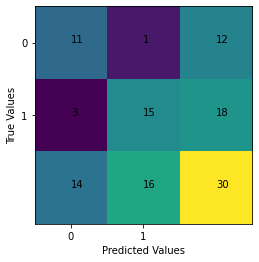

In [97]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [98]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.916667,0.785714,0.846154,14.000000
female,0.833333,0.937500,0.882353,16.000000
accuracy,0.866667,0.866667,0.866667,0.866667
macro avg,0.875000,0.861607,0.864253,30.000000
weighted avg,0.872222,0.866667,0.865460,30.000000


In [99]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.7297297297297298

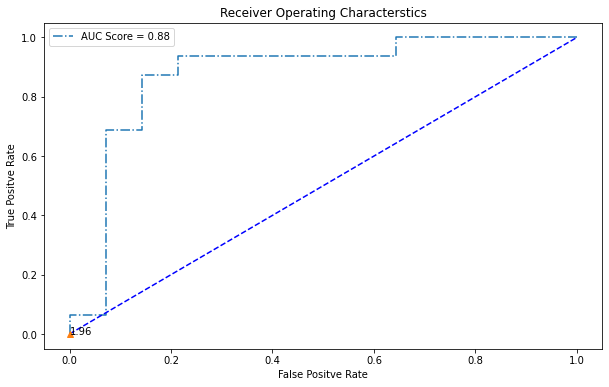

In [100]:
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [101]:
# save our machine learning model
import pickle

In [102]:
pickle.dump(model_best,open('model_svm.pickle','wb'))

In [104]:
pickle.dump(mean,open('./data/mean_preprocess.pickle','wb'))